In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

M = 0.05 #A*m^2
I = 3.33 * 10**-6 #kg * m^2
B = 0.0075 #Tesla or kg/s*A
omega = 200

def solution(U, t):
    #U is a vector such that phi = U[0] and phidot = U[1]
    return [U[1], -M*B/I * np.cos(omega * t) * np.sin(U[0])]

U0 = [0.1,0.1]
ts = np.linspace(0,60,200)
both = odeint(solution, U0, ts)
phi = both[:,0]
phidot = both[:,1]

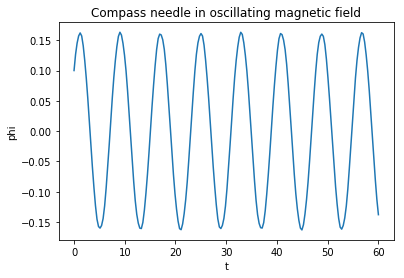

In [2]:
#phi v time
plt.xlabel("t")
plt.ylabel("phi")
plt.title("Compass needle in oscillating magnetic field")
plt.plot(ts,phi)

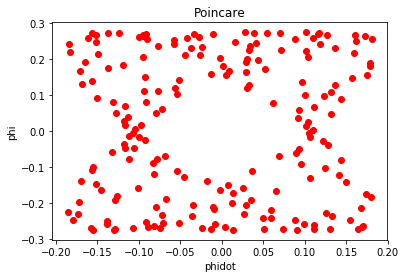

In [11]:
#Poincare, phi v phidot
plt.figure()
plt.xlabel("phidot")
plt.ylabel("phi")
plt.title("Poincare")
plt.plot(phidot, phi, "ro")

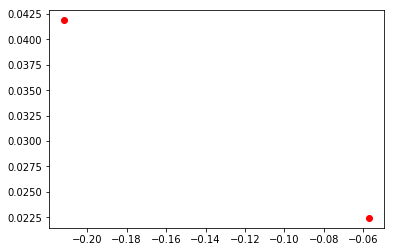

In [80]:
plt.figure()
plt.plot(phidot[1:10000:100],phi[1:10000:100],"ro")

In [2]:
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

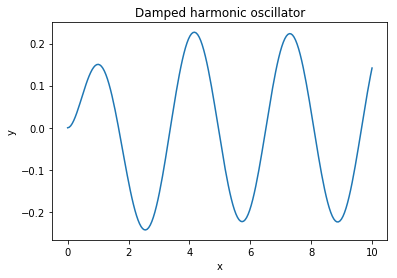

In [3]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(xs,ys);

Text(0, 0.5, 'y')

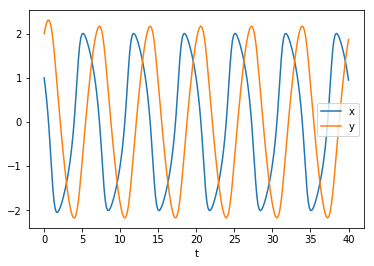

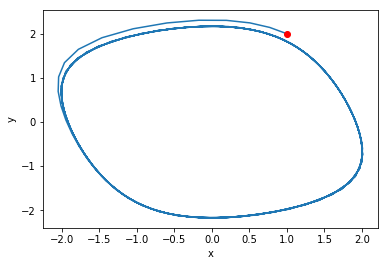

In [7]:
#oscillator example
#Van_der_Pol oscillator
#OG DE: d^2x/dt^2 - mu(1-x^2)dx/dt + x = 0
#let y = x - x^3/3
#then we have 2 DEs: dx/dt = mu(x-1/3x^3 - y) and dy/dt = mu/x

from scipy.integrate import odeint
import numpy as np

mu = 1.0

def vanderpol(X, t):
    x = X[0]
    y = X[1]
    dxdt = mu * (x - 1./3.*x**3 - y)
    dydt = x/mu
    return[dxdt, dydt]
X0 = [1,2]
t = np.linspace(0, 40, 250)
sol = odeint(vanderpol, X0, t)
import matplotlib.pyplot as plt
x = sol[:,0]
y = sol[:,1]
plt.plot(t,x,t,y)
plt.xlabel('t')
plt.legend(('x', 'y'))

#phase portrait
plt.figure()
plt.plot(x,y)
plt.plot(x[0], y[0], 'ro')
plt.xlabel('x')
plt.ylabel('y')

In [8]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

m = 1. #mass
k = 1. #drag
g = 9.81

v0 = np.zeros(4) #initial position
v0[2] = 4.
v0[3] = 10.

def f(v, t0, k):
    u, udot = v[:2], v[2:]
    udotdot = -k/m * udot
    udotdot[1] -= g
    return np.r_[udot,udotdot]